In [2]:
# Einstellungen fuer Plots

imagewidth = 800
plot_size = (21, 14)
half_plot_size = (18, 6)

In [3]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import pandas as pd
import seaborn as sns
import math
from math import log 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import f1_score
from mpl_toolkits import mplot3d
from sklearn import cluster, datasets, mixture
from ipywidgets import interact, fixed


In [4]:
# Change style according to FH
import matplotlib.pyplot as plt
plt.style.use('img/fh_kiel.mplstyle')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from palettable.colorbrewer.qualitative import Paired_8 as q_map

plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#30414D'
green = '#006A4D'
orange = '#E3AB44'
dark_red = '#C55024'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#30414D', '#E3AB44', '#C55024'])
cmap_kiel2 = ListedColormap(['#30414D', '#E3AB44']);

<Figure size 640x480 with 0 Axes>

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke

<div style="text-align: right"> SoSe 2023, Woche 11 v1 </div>

# Klassifizierung mittels Hyperebene

<center><img src="img/tafel_ebene.png" width=30% class="stretch"></center>

* Für jeden Punkt auf der Hyperebene gilt:
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p = 0$$

* Für jeden Punkt der Klasse 1 gilt:
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p > 0$$

* Für jeden Punkt der Klasse -1 gilt:
$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p < 0$$


# Optimierung der Hyperebene

* Wir passen unser Gleichung an und ergänzen $\epsilon$ und $C$:

$$y_i(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p) \ge M (1-\epsilon_i) $$

* Dann folgt daraus unser Optimierungsproblem:

$$\text{max}_{\beta_0, \beta_1, \dots, \beta_p, \epsilon_1, \dots, \epsilon_n, M} M$$
$$\epsilon_i \ge 0, \; \sum_{i=1}^n \epsilon_i \le C$$
$$\sum_{j=1}^p \beta_j^2 = 1$$

* C ist die Obergrenze für die Menge an *Schlupf*, die wir erlauben.


# Transformation in einen höher-dimensionalen Raum

<center><img src="img/tafel_trans.png" width=30% class="stretch"></center>

* Die Grundidee ist es die Daten mittels Transformationen zu beschreiben: $x \rightarrow x, x^2$
* Diese Transformation ermöglicht es deutlich einfacher einen trennende Hyperebene zu finden. 
* Zunächst soll das Wirkprinzip anhand eines Beispiels besprochen. Dies resultiert in erster Linie aber in einem erhöhten Rechenaufwand, da mehr Dimensionen beschrieben werden müssen. 
* Die SVM bedient sich des Kerneltricks, um diesen Anstieg: 
    * recht gering zu halten
    * und die Transformation in das Modell zu ziehen. 

# Heute 

<center><img src="img/ml_map.png" width=50% class="stretch"></center>

* Unser Fokus lag bisher auf dem **Supervised Learning** (Regression, Klassifikation). Lediglich die PCA zählt schon in den Bereich des Unsupervised Learnings. 
* Die Vorgehensweise beim **Unsupervised Learning** wird heute  eingeführt. 
* Zwei der klassischen Algorithmen werden vorgestellt: 
    * k-Means
    * DBSCAN




# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Unsupervised Learning

$$Y = f(X) + \epsilon$$

* Im Supervised Learning ist $Y$ bekannt:
    * Über ein $Y_{Training}$ wird ein Zusammenhang gesucht. 
    * Über ein $Y_{Test}$ wird der Zusammenhang überprüft.


* Im Un-Supervised Learning ist kein $Y$ bekannt: 
    * Der Zusammenhang muss (intern) vom Algorithmus abgeleitet werden.
    * Es gibt (in der Regel) kein falsch oder richtig!

# Unsupervised Learning 

* Neben **Supervised Learning** und **Reinforcement Learning** ist **Unsupervised Learning** eine der großen Kategorien des maschinellen Lernens.
* Ziel ist es oft auf Statistiken basierende Zusammenhänge in den Daten zu "entdecken".
* Die Hauptkomponentenanalyse (PCA) ist eine der Techniken des Unsupervised Learnings.
* Cluster Algorithmen stellen eine zweite große Säule dar.
* Auch im Deep Learning gibt es Unsupervised Anwendungen, z.B. Autoencoder.



* Wofür kann Unsupervised Learning verwendet werden?
    * Visualisierung / Stärkung von Verständnis
    * Aufarbeitung von Daten / Feature Engineering
    * Identifikation von Clustern
    * Identifikation von Ausreißern

# Cluster von Texten 

<center><img src="img/tagcloud.png" width=50% class="stretch"></center>

* Als ein Beispiel für Unsupervised-Learning kann die Ähnlichkeit von Texten untersucht werden. 
* Dies stellt ein Problem des Natural Language Processings  (NLP) dar. 
* Verschiedene Cluster-Algorithmen entdecken Zusammenhänge zwischen Artikeln. 
* Die Eigenschaften der müssen in manueller Analyse (extern) bestätigt / identifiziert werden. 

*Content-driven, unsupervised clustering of news articles through multiscale graph partitioning, M.T. Altuncu et. al.*

# Sklearn Local Outlier Factor

<center><img src="img/lof.png" width=40% class="stretch"></center>

* Ein weiteres Anwendungsbeispiel lässt sich in der Anomaliedetektion finden. 
* Wie können Punkte / Datensätze identifiziert werden, die sich nur sehr schwer einem Cluster zuordnen lassen?
* Diese Punkte stellen dann potentielle Ausreißer oder Anomalien dar. 

*https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html*

# Clusteranalyse

<center><img src="img/tafel_unsuper.png" width=20% class="stretch"></center>


* Der Focus liegt heute auf der Identifizierung von Clustern.
* Ein Cluster ist dabei eine Menge von Objekten, die auf Grund Ihrer Merkmale zusammengefasst werden. 
* Man geht davon aus, dass diese Objekte dann auch gleiche Eigenschaften aufweisen. 
* Objekte können strikt einem oder mehreren Cluster zugehören. 
* Objekte können des weiteren keinem Cluster zugehören und werden dann als Ausreißer identifziert. 

# Clustering am Mondbeispiel


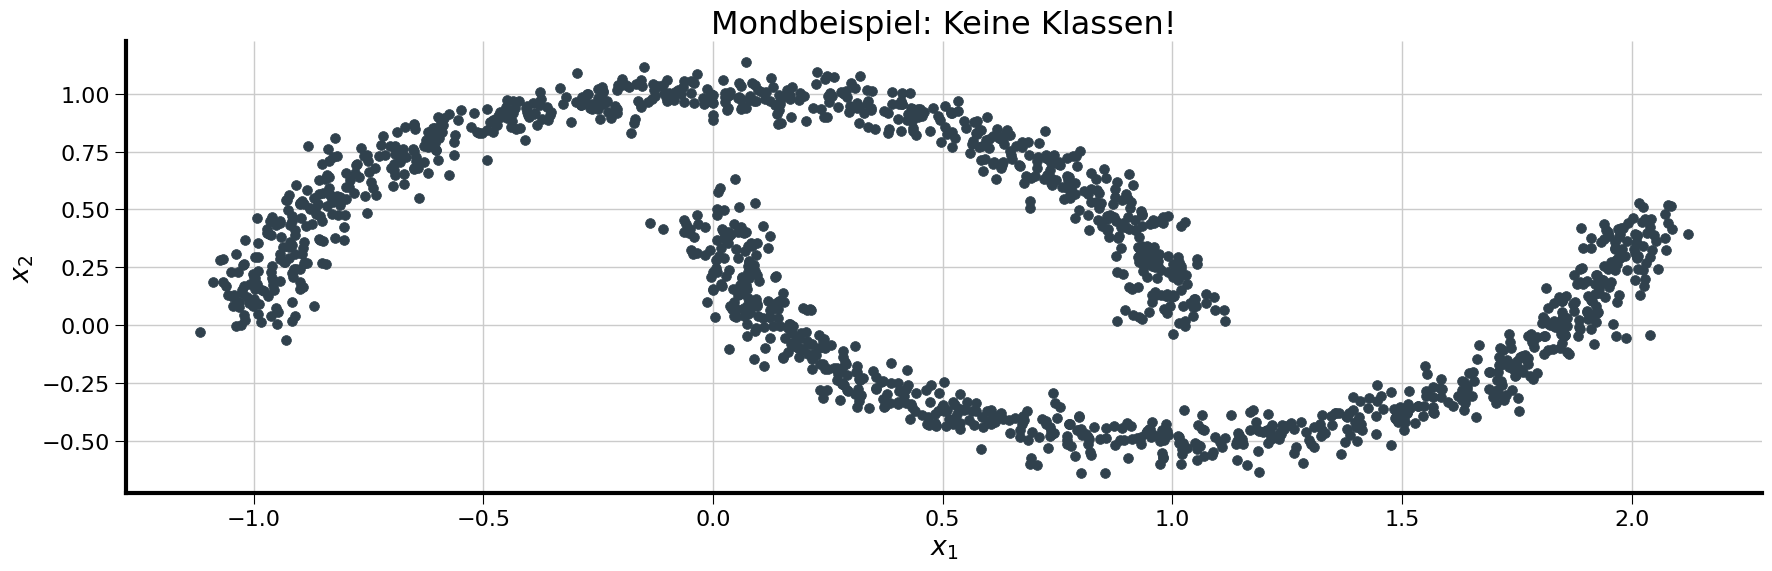

In [5]:
n_samples = 1500
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

X, y = datasets.make_moons(n_samples,  noise=.05)
plt.scatter(X[:, 0], X[:, 1], s=50)

plt.title('Mondbeispiel: Keine Klassen!')
plt.ylabel('$x_2$') 
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.cluster import KMeans

y_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)

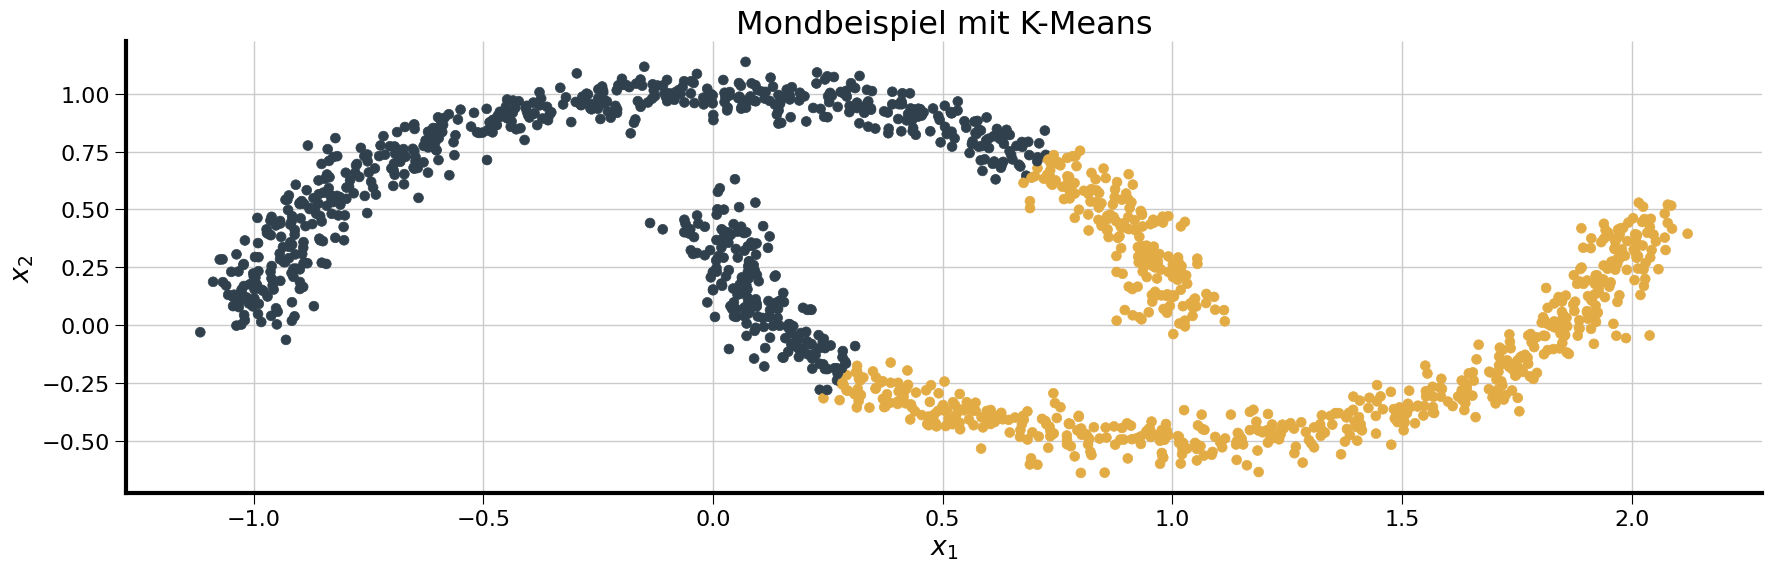

In [7]:
n_samples = 1500
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap=cmap_kiel2)

plt.title('Mondbeispiel mit K-Means')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# K-Means 

<center><img src="img/tafel_kmeans.png" width=20% class="stretch"></center>

* Erzeugt in einem Datensatz eine Anzahl von *K* Clustern. 
* Die Cluster des K-Means überlappen nicht. 
* Innerhalb der Cluster ist die Varianz minimal.
* *Erkennen Sie einen Zusammenhang mit der PCA?*

# K-Means Algorithmus

<center><img src="img/tafel_kmeans.png" width=20% class="stretch"></center>

* $K$ entspricht der Anzahl von Clustern.
* $C_1, \dots, C_k$ entspricht den jeweiligen Clustern, d.h. einer Menge von Punkten.
* $W(C)$ ist die Varianz innerhalb eines Cluster in unserem Fall berechnet über die Eulerdistanz.

$$W(C_k) = \frac{1}{\mid{C_k}\mid}\sum_{i, i^´}\sum_{j=1}^p(x_{ij}-x_{i^´j})^2$$

* Alternative Möglichkeiten sind die Manhatten-Distanz oder Cosinus Ähnlichkeit.

# K-Means Algorithmus II

1. Wir weisen jedem Punkt einen zufälligen Cluster zu!
2. In der Folge wird iteriert:

    2.1 Berechne die Mitte (Means) jedes Clusters
    
    2.2. Weise jedem Punkt den Cluster zu, dessen Mitte er am nächsten ist
    
    

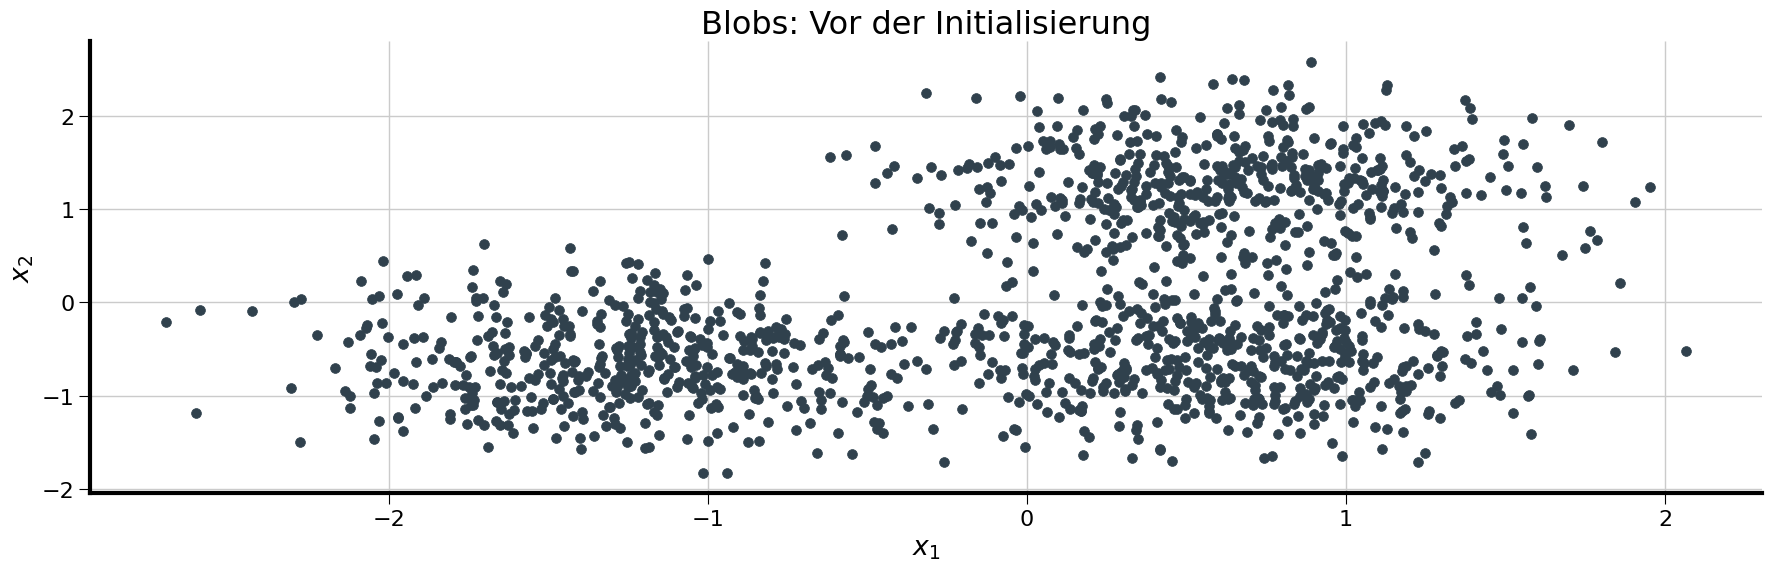

In [8]:
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5, random_state=0)

X = StandardScaler().fit_transform(X)


fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

plt.scatter(X[:, 0], X[:, 1], s=50)

plt.title('Blobs: Vor der Initialisierung')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# Zufällige Initialisierung für 3 Cluster

In [9]:
y_guess = np.random.randint(3, size=n_samples)
y_guess

array([1, 0, 1, ..., 0, 2, 2])

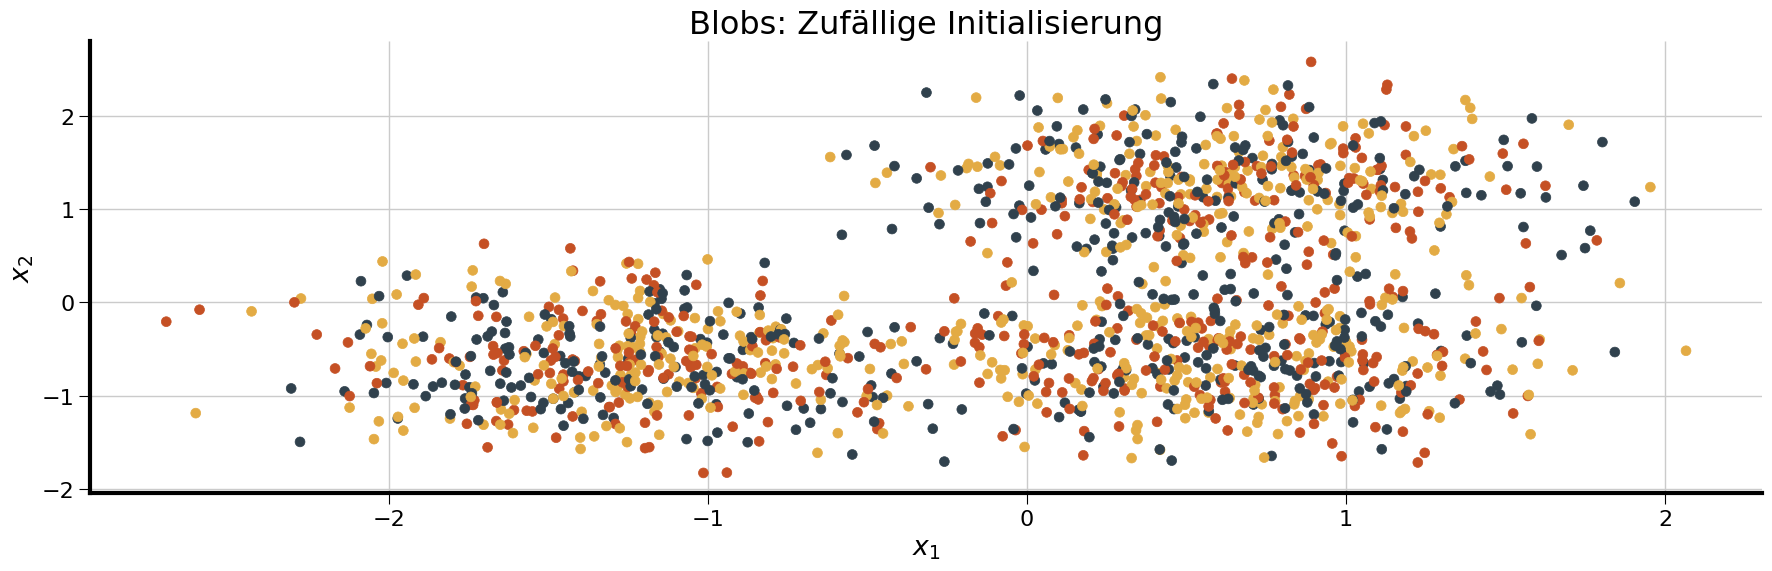

In [10]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

plt.scatter(X[:, 0], X[:, 1], c=y_guess, cmap=cmap_kiel, s=50)

plt.title('Blobs: Zufällige Initialisierung')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# Berechnung der Mitten der Cluster

In [11]:
# Berechnen der Mitten
df = pd.DataFrame({'X1': X[:, 0], 'X2':X[:, 1], 'Cluster':y_guess})
df.groupby('Cluster').mean()

,X1,X2
Cluster,,
0,-0.019826,0.021154
1,0.008619,0.009948
2,0.010827,-0.033508


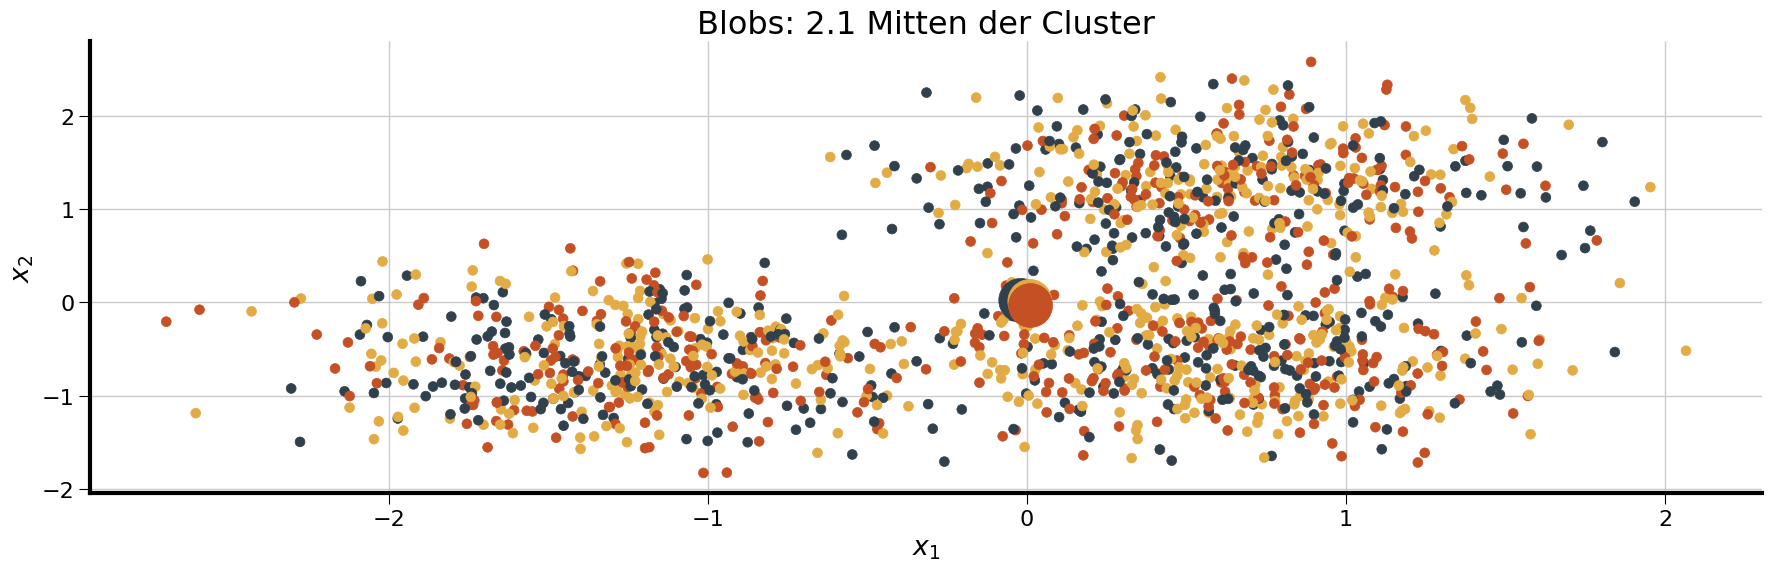

In [12]:

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

plt.scatter(X[:, 0], X[:, 1], c=y_guess, cmap=cmap_kiel, s=50)

means = df.groupby('Cluster').mean()
plt.scatter(means.X1, means.X2, cmap=cmap_kiel,c=[0, 1, 2], s=1000, marker='o')


plt.title('Blobs: 2.1 Mitten der Cluster')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# K-Means Iterationen

* Algorithmus wird bis zur Konvergenz fortgesetzt
* Abhängig von der zufälligen Initialisierung!
* Sollte wiederholt durchgeführt werden!

In [13]:
from sklearn.preprocessing import StandardScaler

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def plot_kmeans_over_iteration(iteration=0):
    fig, ax = plt.subplots(1, 1, figsize=plot_size)
    
    df_plot = df.copy()
    for i in range(iteration):
        means = df_plot.groupby('Cluster').mean()
        df_plot['Cluster'] = closest_centroid(df_plot[['X1', 'X2']].values, means[['X1', 'X2']].values)
    
    
    plt.scatter(df_plot['X1'], df_plot['X2'], c=df_plot['Cluster'].values, cmap=cmap_kiel, s=50)
    try:
        plt.scatter(means.X1, means.X2, cmap=cmap_kiel,c=[0, 1, 2], s=1000, marker='o', edgecolors='b')
    except: 
        pass


    plt.title('Blobs: K-Means Iteration: %s' %iteration)
    plt.ylabel('$x_2$')
    plt.xlabel('$x_1$')
    plt.tight_layout()
    plt.show()
    

centers = [[1, 1], [-1, -1], [1, -1]]
n_samples = 1500
X, _ = datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5, random_state=0)
df = pd.DataFrame({'X1': X[:, 0], 'X2':X[:, 1], 'Cluster':y_guess})

X = StandardScaler().fit_transform(X)
y_guess = np.random.randint(3, size=n_samples)
y_guess
    
interact(plot_kmeans_over_iteration, iteration=(0, 10));


interactive(children=(IntSlider(value=0, description='iteration', max=10), Output()), _dom_classes=('widget-in…

# Was ist die korrekte Anzahl von $k$?

* Die korrekte Anzahl von Clustern zu finden ist eine komplexe Aufgabe.
* Oft bleibt nur die Möglichkeit einer manuellen Untersuchung, um festzustellen, ob die Cluster "sinnig" gewählt wurden.
* Eine gängige Möglichkeit ist ein Ellbogendiagramm.

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.5, random_state=0)

X = StandardScaler().fit_transform(X)

def plot_k_means_over_k(k=2):
    fig, ax = plt.subplots(1, 1, figsize=plot_size)
    y_kmeans = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = y_kmeans,  s=50, cmap=cmap_kiel)

    plt.title('Blobs: mit K = %s' %k)
    plt.ylabel('$x_2$')
    plt.xlabel('$x_1$')
    plt.tight_layout()
    plt.show()
    
interact(plot_k_means_over_k, k=(1,5));

interactive(children=(IntSlider(value=2, description='k', max=5, min=1), Output()), _dom_classes=('widget-inte…

# Ellbogen Diagramm

<center><img src="img/tafel_ellbogen.png" width=20% class="stretch"></center>


* Hier ist die Summe der Entfernungen zum Cluster Mittelpunkt aufgetragen. 
* Der *Ellbogen* bei 3 verdeutlich die Stelle an der keine große Verbesserung durch weitere Cluster mehr erreicht wird.
* Andere mögliche Metriken sind die Verhältnisse der Varianzen innerhalb und zwischen den Clustern.

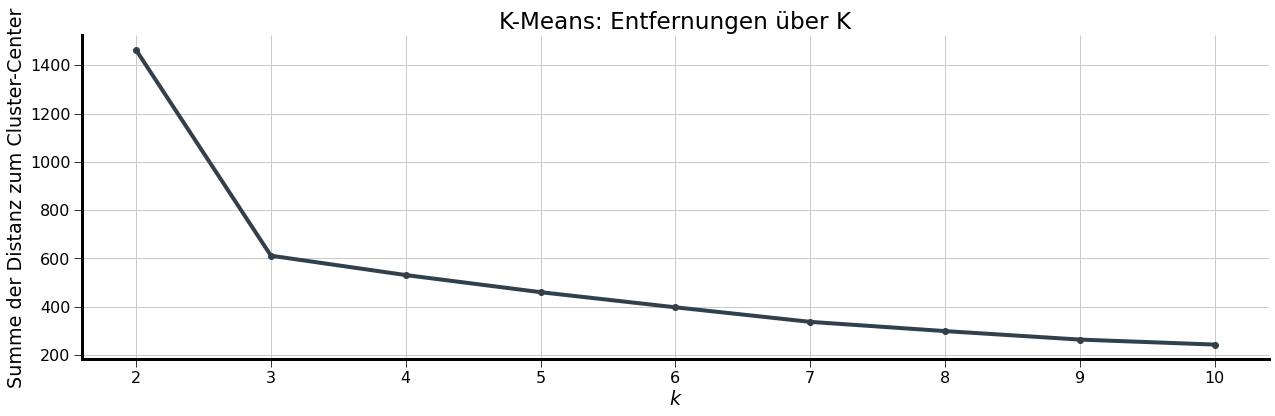

In [14]:
distances = []
ks = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit_predict(X)
    ks.append(i)
    distances.append(kmeans.inertia_)
    
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(ks, distances, '.-')

plt.title('K-Means: Entfernungen über K')
plt.ylabel('Summe der Distanz zum Cluster-Center')
plt.xlabel('$k$')
plt.tight_layout()
plt.show()


## Vorteile K-Means

* Einfach
* Schnell
* Parallelisierbar

## Schwachstellen von K-Means

* Prototyp-basiertes Clustererfahren
* Das richtige $k$ zu finden ist schwierig
* Anfällig für Rauschen in den Daten
* Funktioniert am besten für einfache Geometrien (Monddatensatz als Gegenbeispiel) 



# Steckbrief K-Means


<center><img src="img/steckbrief_kmeans.png" width=60% class="stretch"></center>



# Density Based Spatial Clustering of Applications with Noise (DBSCAN)

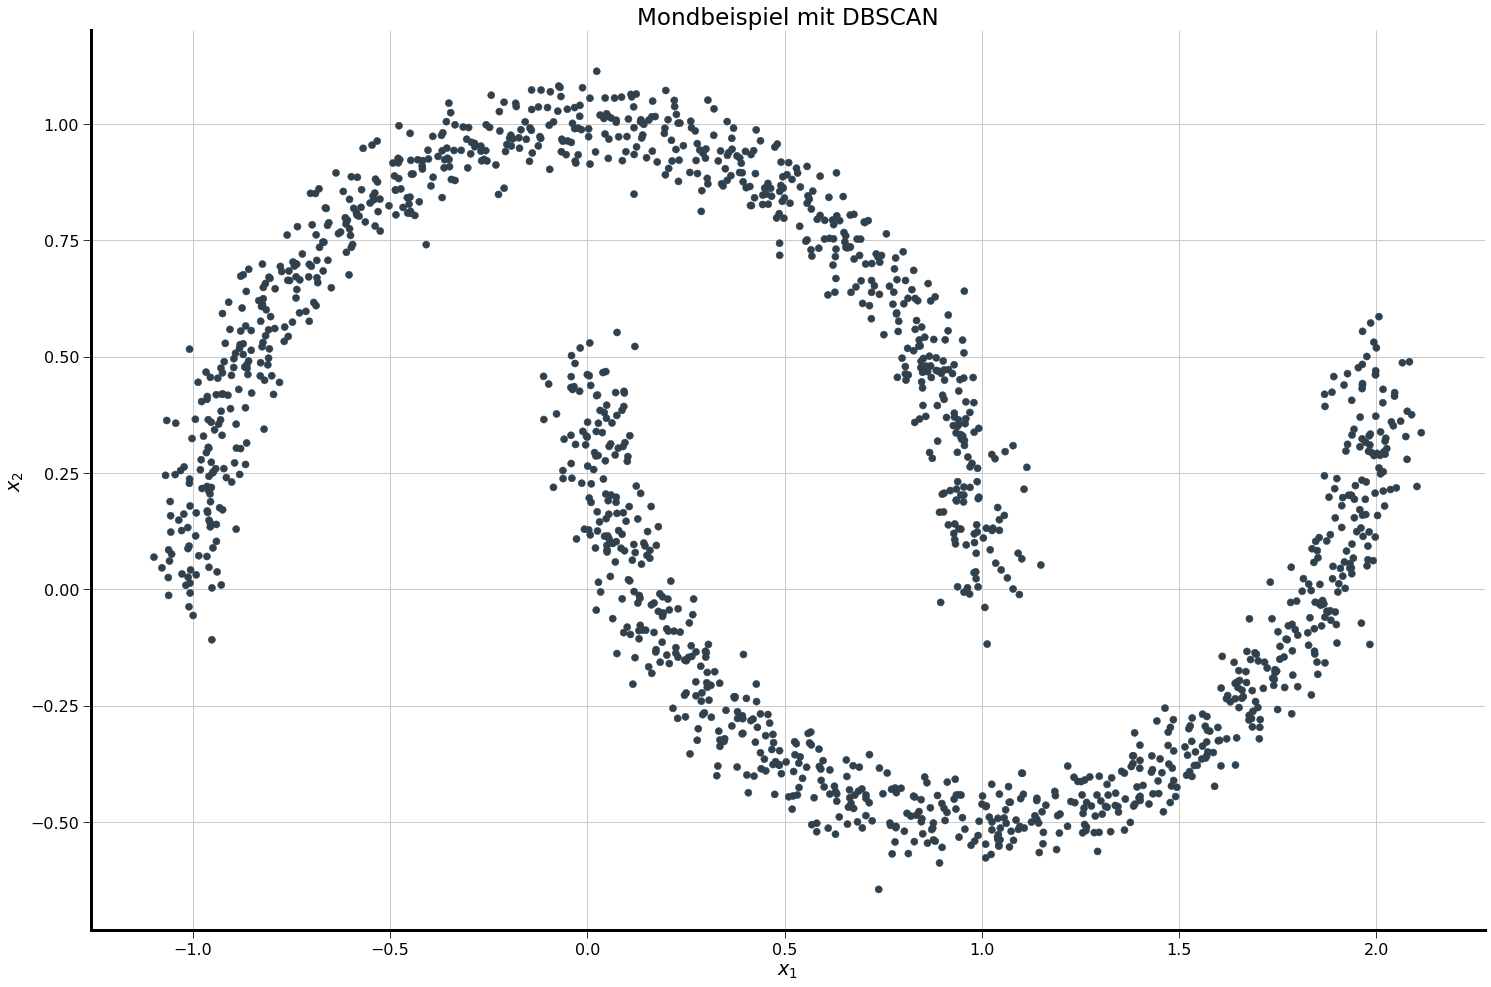

In [15]:
from sklearn.cluster import DBSCAN

n_samples = 1500
X, y = datasets.make_moons(n_samples,  noise=.05)

y_dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
y_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=plot_size)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan.labels_, s=50, cmap=cmap_kiel2)

plt.title('Mondbeispiel mit DBSCAN')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.tight_layout()
plt.show()

# DBSCAN Algorithmus

<center><img src="img/tafel_dbscan.png" width=40% class="stretch"></center>


* DBSCAN ist ein *dichte-basierter* Cluster Algorithmus.
* Keine starke Abhängigkeit von der Geometrie im Vergleich zu k-Means.
* Punkte werden eingeteilt in eine von drei Kategorien:
    * Kernpunkt (liegt im dichten Bereich und hat genügend Nachbarn)
    * Randpunkt (liegt im dichten Bereich)
    * Rauschpunkt (Weder Kern- noch Rauschpunkt)

# DBSCAN Algorithmus

* Zwei wichtige Parameter
    * $\epsilon$ entspricht dem Radius rund um einen Punkt.
    * $n_{points}$ entspricht der minimalen Anzahl von Punkten innerhalb des Radius.
    



* Initialisiere alle Punkte als cluster-los.
* Entscheide für jeden Punkt, ob er ein Kernpunkt ist oder nicht:
    * Wenn ja, finde alle Kern- und Randpunkte, um diesen Punkt (Cluster).
    * Wenn nein, markiere den Punkte als Rauschpunkt.

# Demonstration DBSCAN

In [15]:
# -*- coding: utf-8 -*-
"""
This is a simple implementation of DBSCAN intended to explain the algorithm.
@author: Chris McCormick

Adjusted for demonstration purposes, D. Boehnke
"""

import numpy

def MyDBSCAN(D, eps, MinPts, n_samples):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, n_samples):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
           labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Had to speed this up quite a bit, D. Boehnke
    """
    return list(np.where(np.logical_and(np.linalg.norm(D - D[P,:], axis=1)<eps, np.linalg.norm(D - D[P,:], axis=1)>=0.))[0])


centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.3, random_state=0)

X = StandardScaler().fit_transform(X)

def plot_dbscan_iteration(n_examin = 1):
    from sklearn.preprocessing import StandardScaler

    fig, ax = plt.subplots(1, 1, figsize=plot_size)
    df = pd.DataFrame({'X1': X[:, 0], 'X2':X[:, 1], 'Cluster':MyDBSCAN(X, 0.123, 10, n_examin)})
    groups = df.groupby('Cluster')

    for name, group in groups:
        ax.plot(group.X1, group.X2, marker='o', linestyle='', ms=8, label=name)

    ax.legend()
    plt.title('Blobs: DB Scan Iterativ')
    plt.ylabel('$x_2$')
    plt.xlabel('$x_1$')
    plt.tight_layout()
    plt.show()

interact(plot_dbscan_iteration, n_examin=(1,1500));

interactive(children=(IntSlider(value=1, description='n_examin', max=1500, min=1), Output()), _dom_classes=('w…

# Hyperparamter DBSCAN

* Die richtigen Einstellungen für den DBSCAN zu wählen ist nicht einfach. 
* Folgendes Rezept kann unterstützen: 
    * Wähle $n_{points}$, so dass es dem doppelten der verwendeten Spalten entpricht. 
    * Berechne für alle Punkte die Distanz zu den nächsten $n_{points}$. 
    * Trage diese Distanz sortiert auf und finde den "Knick" für das richtige $\epsilon$.

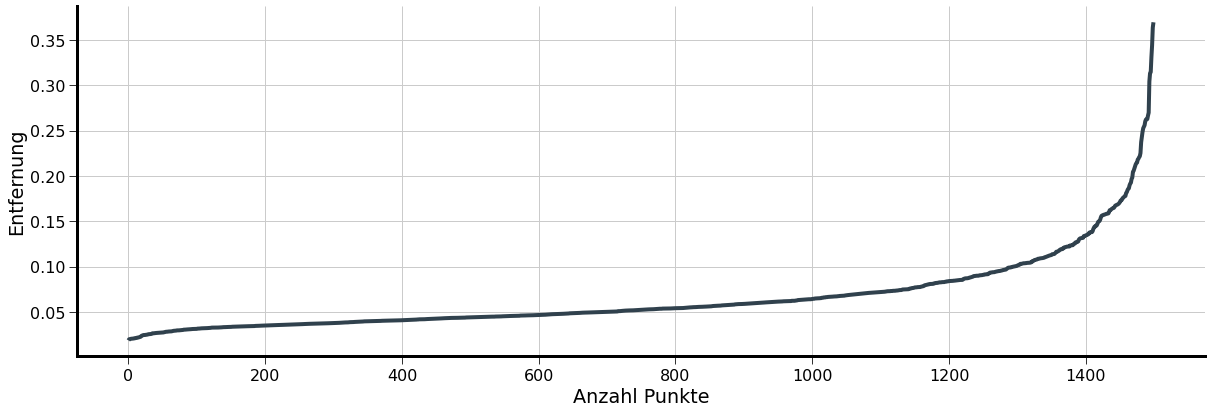

In [17]:
from sklearn.neighbors import NearestNeighbors

fig = plt.figure(figsize=half_plot_size)
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,4], axis=0)
plt.plot(distances)
plt.xlabel("Anzahl Punkte")
plt.ylabel("Entfernung");

## Vorteile DBSCAN

* Beliebige Geometrien
* Robust gegenüber Rauschen
* Deterministisch

## Nachteile DBSCAN

* Datensätze mit unterschiedlicher Dichte sind problematisch
* Zwei Hyperparameter müssen eingestellt werden
* Rechenaufwendig

# Steckbrief DBSCAN


<center><img src="img/steckbrief_dbscan.png" width=60% class="stretch"></center>



# Beispiel: Unsupervised Learning auf dem Titanic Datensatz

* Können Cluster unter den Passagieren identifiziert werden? 
* Sind diese mit bestehenden Kategorien vergleichbar?

In [18]:
# Lade Datensatz
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
df = pd.get_dummies(df, columns=['Embarked' ])
df.Sex = df.Sex.replace('male', '0')
df.Sex = df.Sex.replace('female', '1')
df.Sex = pd.to_numeric(df.Sex)
df.fillna(df.mean(), inplace=True)
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Sex', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]

/var/folders/3j/b6syzxns7712b70_rnpwyd50f5cv7v/T/ipykernel_2555/1619052607.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,Embarked_C
0,0,3,22.000000,1,0,7.2500,0,0,1,0
1,1,1,38.000000,1,0,71.2833,1,0,0,1
2,1,3,26.000000,0,0,7.9250,1,0,1,0
3,1,1,35.000000,1,0,53.1000,1,0,1,0
4,0,3,35.000000,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,1,0
887,1,1,19.000000,0,0,30.0000,1,0,1,0
888,0,3,29.699118,1,2,23.4500,1,0,1,0
889,1,1,26.000000,0,0,30.0000,0,0,0,1


# Visualisierung der Daten mittels PCA

In [19]:
# Skaliere die Daten

X = df[['Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Sex',  'Embarked_Q', 'Embarked_S', 'Embarked_C']]
X = MinMaxScaler().fit_transform(X)

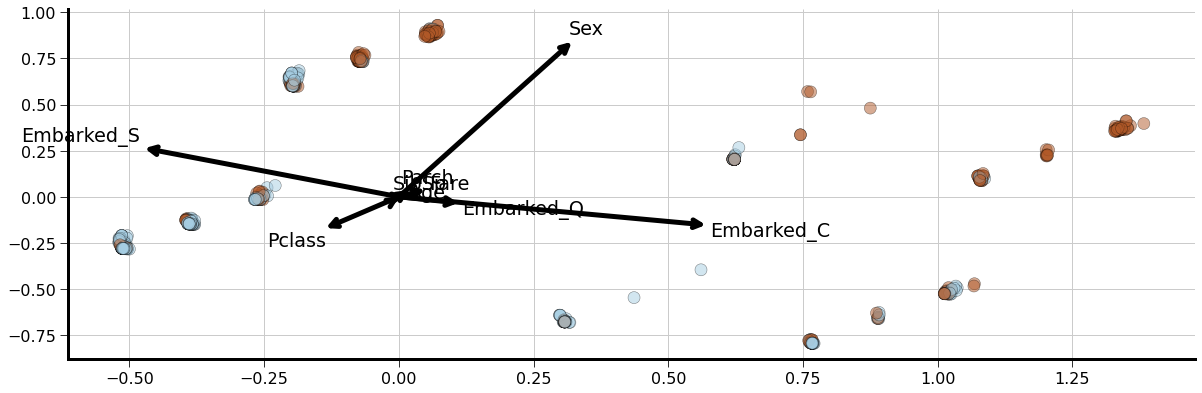

In [20]:
# Beispiel Anwendung Cluster. Z.B. Titanic Datensatz
from sklearn.decomposition import PCA
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(X)
trans = pca.transform(X)
df['pca1'] = trans[:,0]
df['pca2'] = trans[:,1]
plt.scatter(df['pca1'], df['pca2'], c=(df['Survived']).tolist(), edgecolors='k', alpha=.5)

arrow=1
for i, l in enumerate(['Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Sex', 'Embarked_Q', 'Embarked_S', 'Embarked_C']):
    plt.annotate(l, xy=(0, 0), xycoords='data',
             xytext=(pca.components_[0][i]*arrow, pca.components_[1][i]*arrow), textcoords='data',
             arrowprops=dict(edgecolor='k', lw=5, arrowstyle='<-'), fontsize='large')


# K-Means

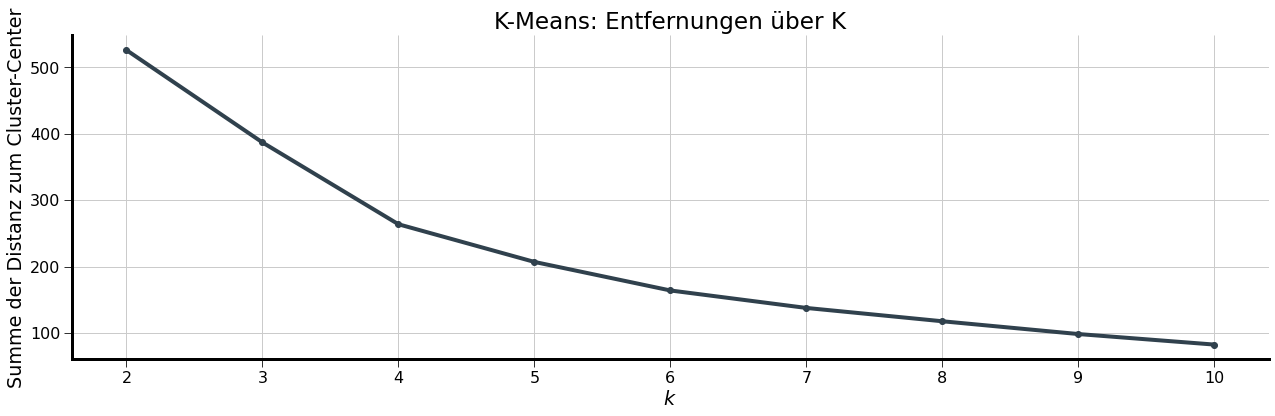

In [21]:
distances = []
ks = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit_predict(X)
    ks.append(i)
    distances.append(kmeans.inertia_)
    
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(ks, distances, '.-')

plt.title('K-Means: Entfernungen über K')
plt.ylabel('Summe der Distanz zum Cluster-Center')
plt.xlabel('$k$')
plt.tight_layout()
plt.show()


In [22]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['kmeans'] = kmeans.fit_predict(X)

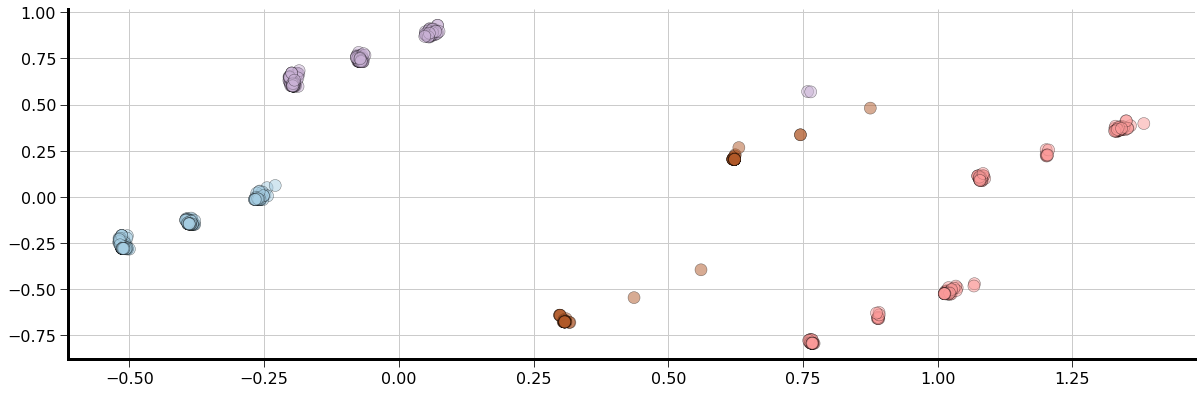

In [23]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
plt.scatter(df['pca1'], df['pca2'], c=(df['kmeans']).tolist(), edgecolors='k', alpha=.5);

# DBSCAN

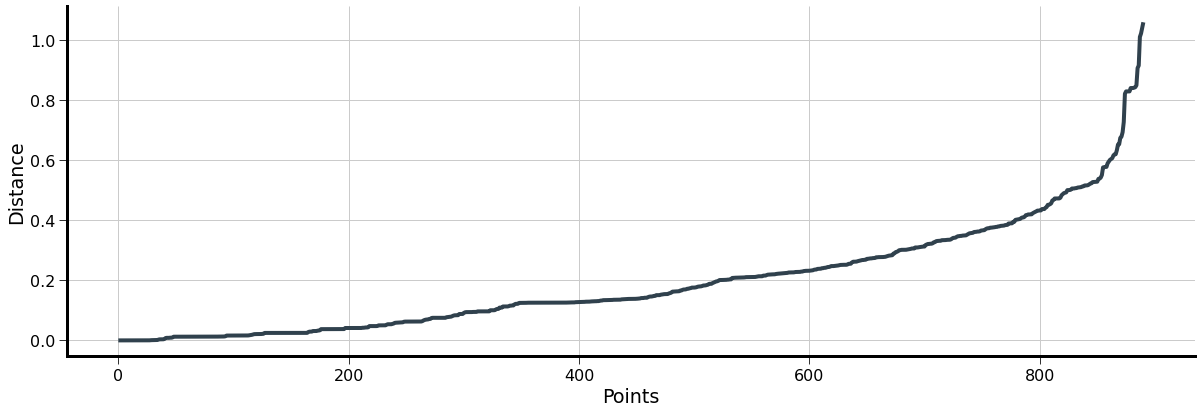

In [24]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=21)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,20], axis=0)
fig = plt.figure(figsize=half_plot_size)
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance");

In [25]:
y_dbscan = DBSCAN(eps=.6, min_samples=20).fit(X)
df['dbscan'] = y_dbscan.labels_
np.unique(y_dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

/var/folders/3j/b6syzxns7712b70_rnpwyd50f5cv7v/T/ipykernel_2555/1638374320.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


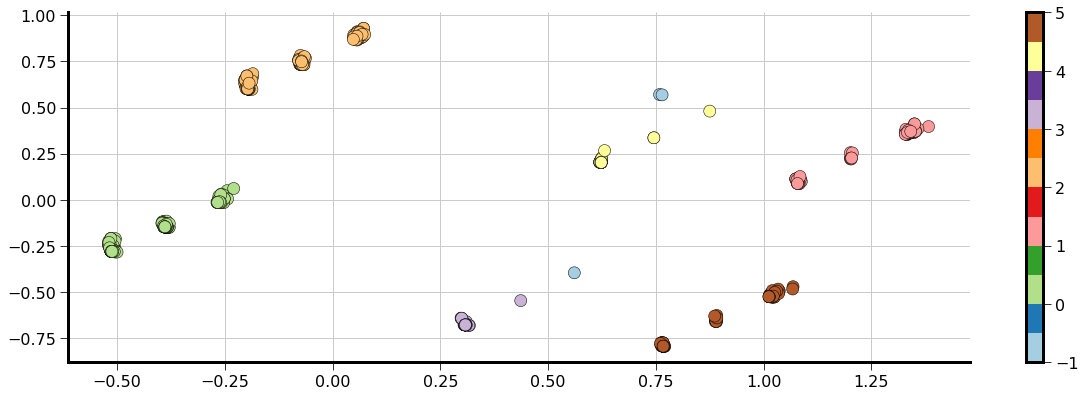

In [26]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)
plt.scatter(df['pca1'], df['pca2'], c=(df['dbscan']).tolist(), edgecolors='k', alpha=1)
plt.colorbar();

# Zusammenfassung

* Unsupervised Learning
    * K-Means
    * DBSCAN
* Nächste Woche: Ausblick Neuronale Netze, Deep Learning